In [38]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Path to the directory containing CSV files
directory_path = '/Users/physarah/Desktop/cleaned_data/'

# List all CSV files in the directory
csv_files = glob.glob(directory_path + '*.csv')

# Initialize an empty list to store individual DataFrames
dfs = []

# Loop through each CSV file and read it into a DataFrame
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
final_dataframe = pd.concat(dfs, ignore_index=True)

# Display the resulting DataFrame
#print(final_dataframe)

In [4]:
final_dataframe.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'source_mean', 'source_median',
       'source_sum', 'source_rate', 'sky_mean', 'sky_median', 'sky_sum',
       'sky_rate', 'target_mean', 'target_median', 'target_sum', 'target_rate',
       'sc_area', 'bk_area', 'exposure_time', 'datetimes_sat', 'gains_sat',
       'airmass', 'm_inst', 'm_inst_sky', 'calibed_mags', 'altitude',
       'azimuth', 'utc', 'zenith_angle', 'km_distance', 'sunsep'],
      dtype='object')

In [22]:
# Path to the directory containing CSV files
directory_path = '/Users/physarah/Desktop/cleaned_data/'

# List all CSV files in the directory
csv_files = glob.glob(directory_path + '*.csv')

# Initialize an empty list to store individual DataFrames
dfs = []

# Loop through each CSV file and read it into a DataFrame
for file in csv_files:
    df = pd.read_csv(file)
    file_name = os.path.basename(file)
    desired_part = file_name.split('-P1')[0]
    desired_part_norad = file_name.split('-')[2].rstrip('UP1cleaned.csv')
    sat_names = [desired_part]*len(df['datetimes_sat'])
    norad_id = [desired_part_norad]*len(df['datetimes_sat'])

    df['sat_name'] = sat_names
    df['norad_id'] = norad_id
    dfs.append(df)

In [23]:
final_dataframe = pd.concat(dfs, ignore_index=True)


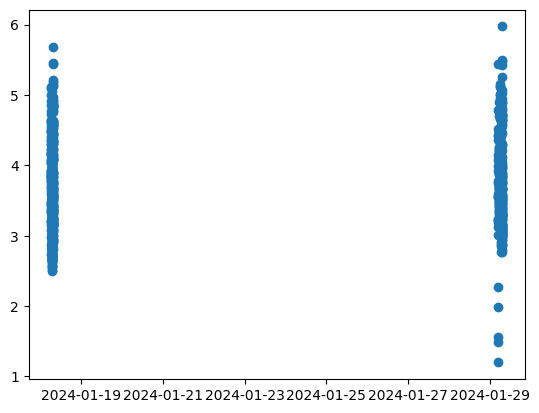

In [19]:
plt.scatter(pd.to_datetime(final_dataframe['datetimes_sat']),final_dataframe['calibed_mags'])

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  2.,  3.,  2.,  9.,  9.,  9., 11., 12., 13., 11., 19., 16.,
        27., 28., 26., 25., 22., 29., 30., 29., 28., 26., 31., 31., 33.,
        34., 31., 23., 32., 19., 24., 15., 14., 22., 16., 10., 17., 10.,
        12., 13.,  8., 17.,  8., 10., 10.,  5.,  7.,  3.,  6., 11.,  6.,
         5.,  3.,  2.,  3.,  5.,  2.,  1.,  0.,  0.,  0.,  3.,  3.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([1.19871829, 1.24647371, 1.29422914, 1.34198457, 1.38974   ,
        1.43749542, 1.48525085, 1.53300628, 1.58076171, 1.62851713,
        1.67627256, 1.72402799, 1.77178342, 1.81953884, 1.86729427,
        1.9150497 , 1.96280513, 2.01056056, 2.05831598, 2.10607141,
        2.15382684, 2.20158227, 2.24933769, 2.29709312, 2.34484855,
        2.39260398, 2.4403594 , 2.48811483, 2.53587026, 2.58362569,
        2.63138111, 2.6791

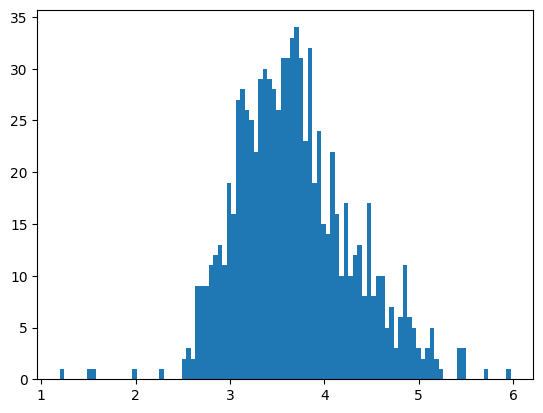

In [21]:
plt.hist(final_dataframe['calibed_mags'], bins = 100)

In [26]:
norad_id_sats = pd.read_csv('/Users/physarah/Development/satellite-optical-brightness/data/brightness_config_list.csv')

In [34]:
sat_ids = list(norad_id_sats['# This file contains a list of NORAD CAT IDs'][6:])

In [39]:
final_dataframe['v_type'] = np.where(final_dataframe['norad_id'].isin(sat_ids), 'V1.5', 'V1')

In [42]:
final_dataframe_v15 = final_dataframe[final_dataframe['v_type']=='V1.5']
final_dataframe_v1 = final_dataframe[final_dataframe['v_type']=='V1']

(array([ 3.,  1.,  1.,  2.,  9., 26., 15.,  7.,  4.,  1.]),
 array([1.19871829, 1.62246749, 2.0462167 , 2.4699659 , 2.89371511,
        3.31746431, 3.74121352, 4.16496272, 4.58871192, 5.01246113,
        5.43621033]),
 <BarContainer object of 10 artists>)

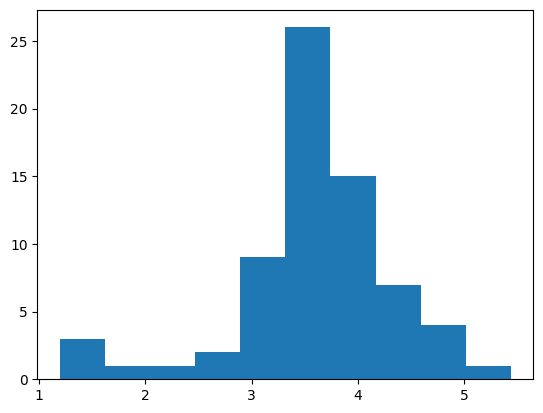

In [45]:
plt.hist(final_dataframe_v15['calibed_mags'], bins = 10)

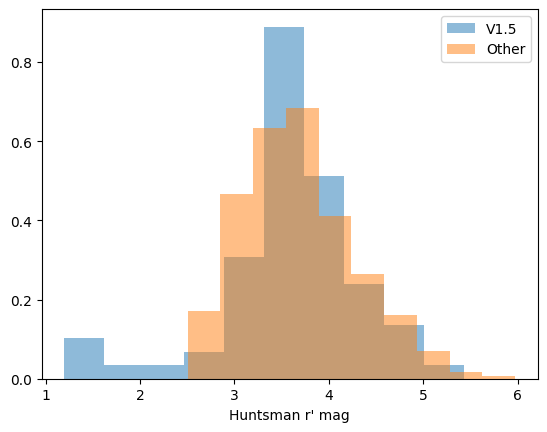

In [58]:
plt.hist(final_dataframe_v15['calibed_mags'], bins = 10, density=True, alpha = 0.5, label = "V1.5")
plt.hist(final_dataframe_v1['calibed_mags'], bins = 10, density=True, alpha = 0.5, label = "Other")
plt.legend()
plt.xlabel("Huntsman r' mag")
plt.savefig("/Users/physarah/Desktop/version_comparison.png")
